In [22]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import folium
import numpy as np
from folium import plugins


In [23]:
df= pd.read_csv('2021-07-thames-valley-street.csv')

In [24]:
df.drop(columns=['Crime ID','Falls within','LSOA code','LSOA name','Last outcome category','Context'],axis=1,inplace=True)
df.head()

,Month,Reported by,Longitude,Latitude,Location,Crime type
0,2021-07,Thames Valley Police,-0.977083,51.995404,On or near Otters Brook,Anti-social behaviour
1,2021-07,Thames Valley Police,-0.975290,51.992268,On or near Deerfield Close,Anti-social behaviour
2,2021-07,Thames Valley Police,-0.975290,51.992268,On or near Deerfield Close,Anti-social behaviour
3,2021-07,Thames Valley Police,-0.975290,51.992268,On or near Deerfield Close,Burglary
4,2021-07,Thames Valley Police,-0.977083,51.995404,On or near Otters Brook,Vehicle crime


In [25]:
print(len(df['Latitude']))

19846


In [26]:
indexnames = df[(df['Latitude']>51.493204)].index
df.drop(indexnames, inplace = True)

indexnames = df[(df['Latitude']<51.409763)].index

df.drop(indexnames, inplace = True)

indexnames = df[(df['Longitude']<-1.063447)].index
df.drop(indexnames, inplace = True)

indexnames = df[(df['Longitude']>-0.928522)].index
df.drop(indexnames, inplace = True)

df['Latitude']

8469     51.483217
8470     51.483678
8471     51.484764
8472     51.484755
8473     51.486748
           ...    
19841          NaN
19842          NaN
19843          NaN
19844          NaN
19845          NaN
Name: Latitude, Length: 2989, dtype: float64

In [27]:
df.dropna(inplace=True)
df.groupby('Crime type').count()

df_2021 = df.copy()

In [28]:
print("There are {} unique categories of crime".format(len(df['Crime type'].unique())))

There are 14 unique categories of crime


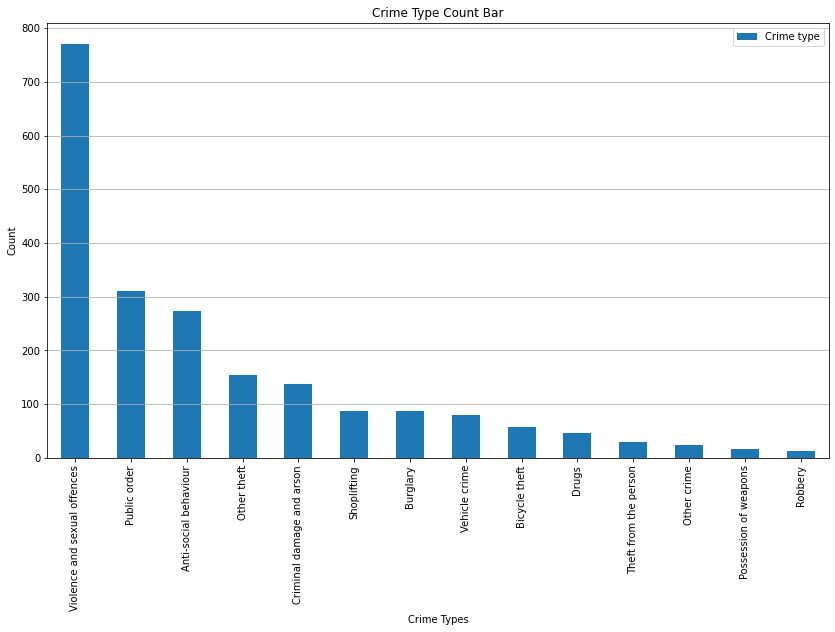

In [29]:
df['Crime type'].value_counts().plot(kind='bar',title = 'Crime Type Count Bar' ,figsize=(14,8), legend= 1)
plt.xlabel('Crime Types')
plt.ylabel('Count')
plt.grid(axis='y')

In [30]:
map_crime= folium.Map([51.493,-0.928],zoom_start =13)
convert = df[["Latitude","Longitude"]].values
colors = ['red', 'blue', 'purple', 'yellow', 'beige', 'darkgreen', 'darkblue','lightgreen','darkred','lighgray','orange','cadetblue','black','pink' ]



for lat,lng,crime in zip(df['Latitude'],df['Longitude'],df['Crime type']):
    label='{}'.format(crime)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 1,
        popup = label,
        color = 'red',
        fill=False,
        fill_color='#3186cc',
        fill_opacity=0.7,
        legend_name = "Crime Map Reading",
        parse_html=False).add_to(map_crime)
map_crime.add_child(plugins.HeatMap(convert,radius =13)) 
folium.LayerControl().add_to(map_crime)






map_crime
    



# Now I will load the crime data for the same area from year 2020 to compare the changes.

In [31]:
df2 = pd.read_csv("2020-07-thames-valley-street.csv")

# I have dropped some of the columns that were unncessary for this analysis.

In [32]:
df2.drop(columns=['Crime ID','Falls within','LSOA code','LSOA name','Last outcome category','Context'],axis=1,inplace=True)
df2.head()

,Month,Reported by,Longitude,Latitude,Location,Crime type
0,2020-07,Thames Valley Police,-0.970232,51.992467,On or near Sycamore Close,Drugs
1,2020-07,Thames Valley Police,-0.972323,51.991460,On or near Osprey Walk,Public order
2,2020-07,Thames Valley Police,-0.975290,51.992268,On or near Deerfield Close,Vehicle crime
3,2020-07,Thames Valley Police,-0.985433,51.994595,On or near Brookfield Lane,Anti-social behaviour
4,2020-07,Thames Valley Police,-0.993502,51.994583,On or near Mitre Street,Criminal damage and arson


## By using the method below I filtered the data set to central reading only.

In [33]:
indexnames2 = df2[(df2['Latitude']>51.493204)].index
df2.drop(indexnames2, inplace = True)

indexnames2 = df2[(df2['Latitude']<51.409763)].index

df2.drop(indexnames2, inplace = True)

indexnames2 = df2[(df2['Longitude']<-1.063447)].index
df2.drop(indexnames2, inplace = True)

indexnames2 = df2[(df2['Longitude']>-0.928522)].index
df2.drop(indexnames2, inplace = True)

In [34]:
df2.dropna(inplace=True) #To get rid of null values
df2.groupby('Crime type').count()

df_2020 = df2.copy()

In [35]:
crimes_2020 = df_2020['Crime type']
crimes_2021 = df_2021['Crime type']

df_m = pd.DataFrame({'crimes_2020': pd.Series(crimes_2020), 'crimes_2021': pd.Series(crimes_2021)})
df_m

,crimes_2020,crimes_2021
7458,Anti-social behaviour,NaN
7459,Anti-social behaviour,NaN
7460,Criminal damage and arson,NaN
7461,Shoplifting,NaN
7462,Vehicle crime,NaN
...,...,...
17534,NaN,Anti-social behaviour
17535,NaN,Anti-social behaviour
17536,NaN,Criminal damage and arson
17537,NaN,Drugs


In [96]:
crime_count_2020_list = []
crime_type_2020 = df_m['crimes_2020'].unique()
crime_type_2020 = [x for x in crime_count_2021 if x == x]
for i in range(len(crime_count_2020)):
    crime_count_2020_list.append(crime_count_2020[i])


crime_count_2021_list = []
crime_type_2021 = df_m['crimes_2021'].unique()
crime_type_2021 = [x for x in crime_count_2021 if x == x]
crime_count_2021 = crimes_2021.value_counts()
for i in range(len(crime_count_2021)):
    crime_count_2021_list.append(crime_count_2021[i])


df_merged = pd.DataFrame({'Crime Type 2020': crime_count_2020, 'Crime Type 2021': crime_count_2021})
df_merged

,Crime Type 2020,Crime Type 2021
Anti-social behaviour,339,274
Bicycle theft,91,58
Burglary,76,87
Criminal damage and arson,172,137
Drugs,67,46
Other crime,25,24
Other theft,118,154
Possession of weapons,21,16
Public order,118,311
Robbery,21,12


<AxesSubplot:>

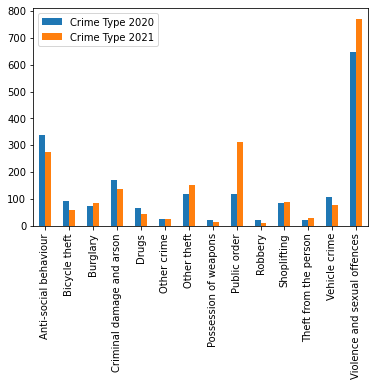

In [103]:
df_merged.plot(y=['Crime Type 2020','Crime Type 2021'], kind = 'bar')